In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import Dependencies
import numpy as np
import pandas as pd

In [3]:
# Import Dependencies
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Create an engine that prepares the datebase file to be connected to later on
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 1.0, 'Amount of Precipitation Over the Past Year in Oahu')

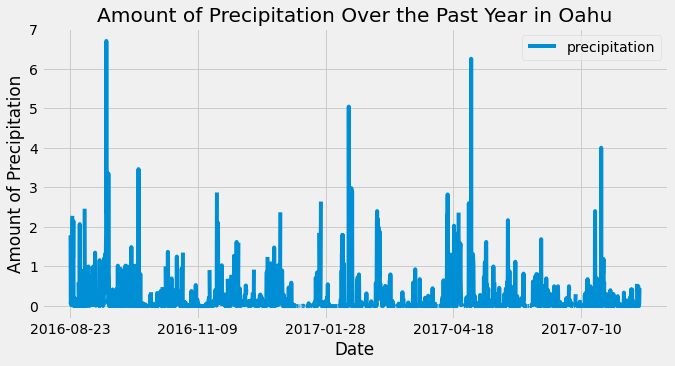

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#Starting from the last data point in the database. 
#prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
    # This was a test to see how queries work: results = session.query(Measurement.date, Measurement.prcp)

    # This code is used to query all measurements from the past year:

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all() 
    # .all() is used to add everything to a list

#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
#print(df) # This print statemenmt prints two dates in one column, to correct for that use:
#print(df.to_string(index=False)) # Use this to print with corrected index

# Use Pandas Plotting with Matplotlib to plot the data
df = df.sort_index() # sort the index by date before plotting using MatPlotLib
#print(df.to_string(index=False)) # Print without the index
df.plot(figsize =(10,5))
plt.xlabel("Date")
plt.ylabel("Amount of Precipitation")
plt.title("Amount of Precipitation Over the Past Year in Oahu")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?

#session.query() # use the earlier session to start a new query

session.query(func.count(Station.station)).all() # add the query needed to the above formula


[(9,)]

In [13]:
# What are the most active stations?

# session.query(Measurement.station, func.count(Measurement.station)) # beginning of the query, 
                                                                        #counts the measurement at each station

# List the stations and the counts in descending order.
    # Uses group_by to measure at each station, and order_by to order them in descending order
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
    # The above query looks at temp data at the most active station

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Histogram of Temperature Observations Over the Past Year')

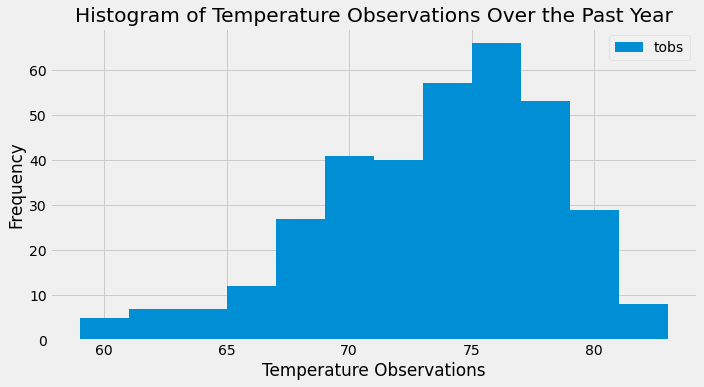

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

#print(results); ,makes data harder to read since it's one long list
    
# Create a dataframe for readibility and to use for a histogram
df = pd.DataFrame(results, columns=['tobs'])
# print(df)

# Create a histogram from the df
df.plot.hist(bins=12, figsize=(10,5))
plt.tight_layout()
plt.xlabel("Temperature Observations")
plt.ylabel("Frequency")
plt.title("Histogram of Temperature Observations Over the Past Year")

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge